/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


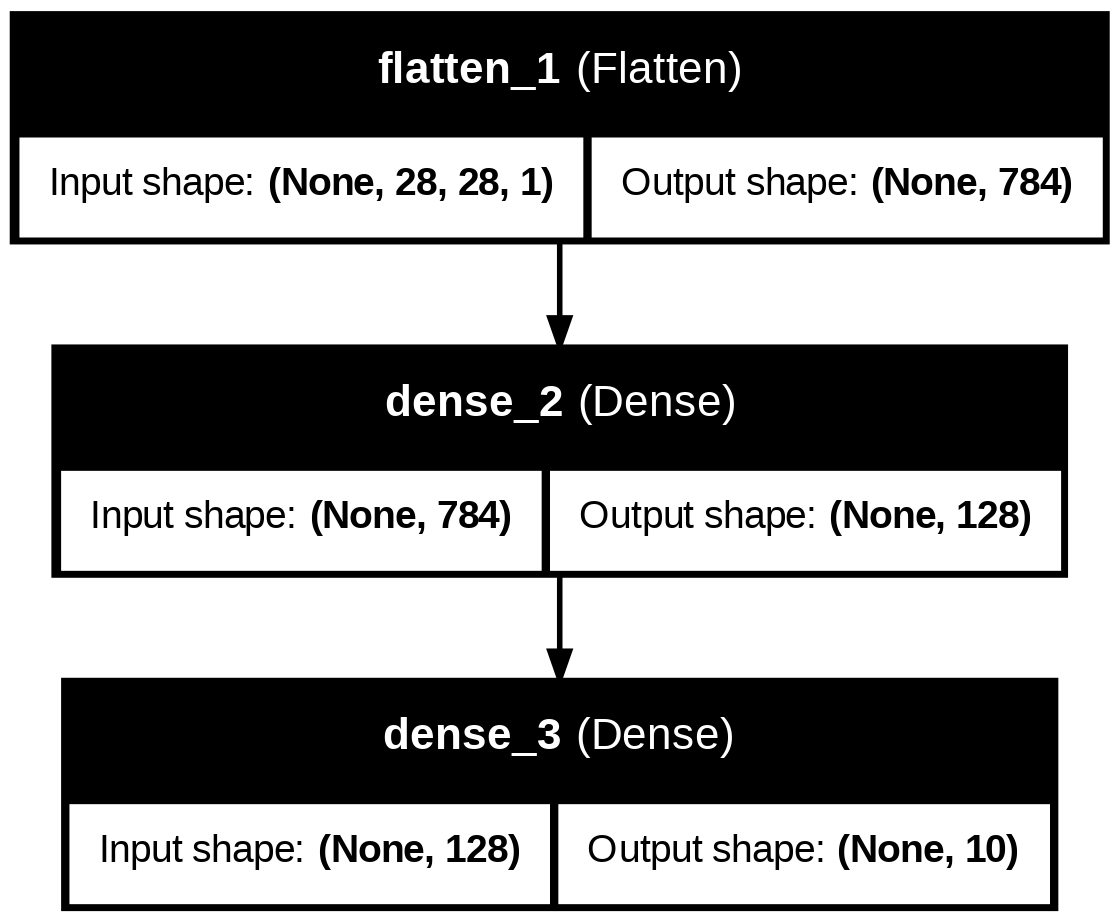

In [ ]:
import tensorflow as tf
import numpy as np

(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

trainX = trainX / 255.0
testX = testX / 255.0

trainX = trainX.reshape( (trainX.shape[0], 28,28,1) )
testX = testX.reshape( (testX.shape[0], 28,28,1) )

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Functional API로 레이어 연결해서 모델 만들기

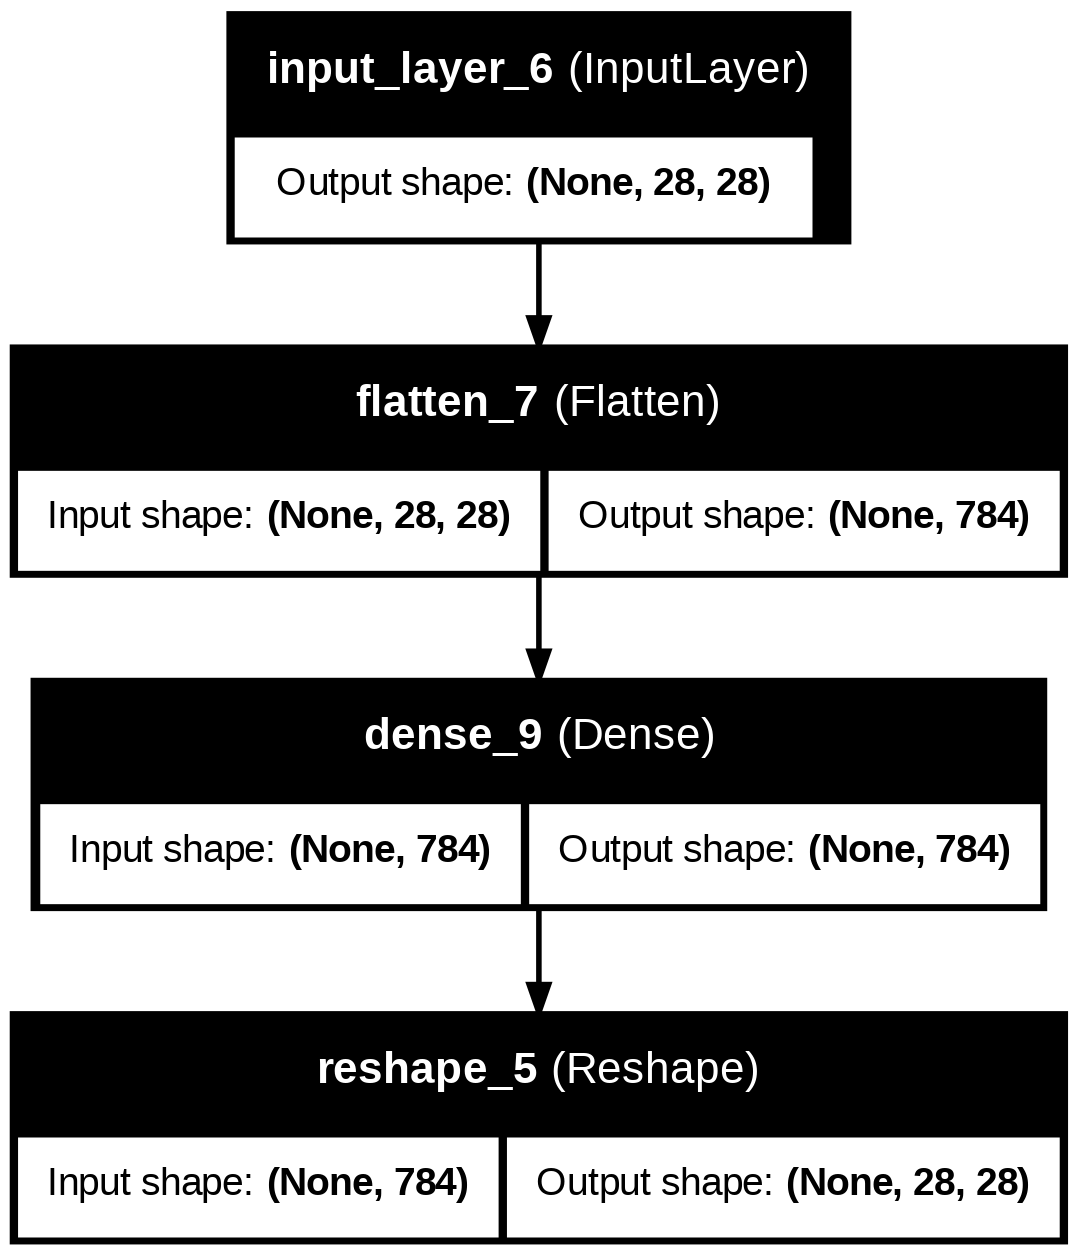

In [ ]:
'''
Functional API로 레이어를 연결할 때는 다음과 같은 점을 신경 써야 한다.

1. 레이어 이름 짓기
2. 이름 정한 레이어를 다음 레이어에 언급하기.

'''

import tensorflow as tf

# 레이어 정의
input1 = tf.keras.layers.Input(shape=[28, 28])
flatten1 = tf.keras.layers.Flatten()(input1)
dense1 = tf.keras.layers.Dense(28*28, activation='relu')(flatten1)
reshape = tf.keras.layers.Reshape((28, 28))(dense1)

# 모델 생성
model = tf.keras.Model(inputs=input1, outputs=reshape)

from tensorflow.keras.utils import plot_model

# 모델 구조 시각화
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Concatenate() 이용해서 복잡한 레이어 구조 만들기

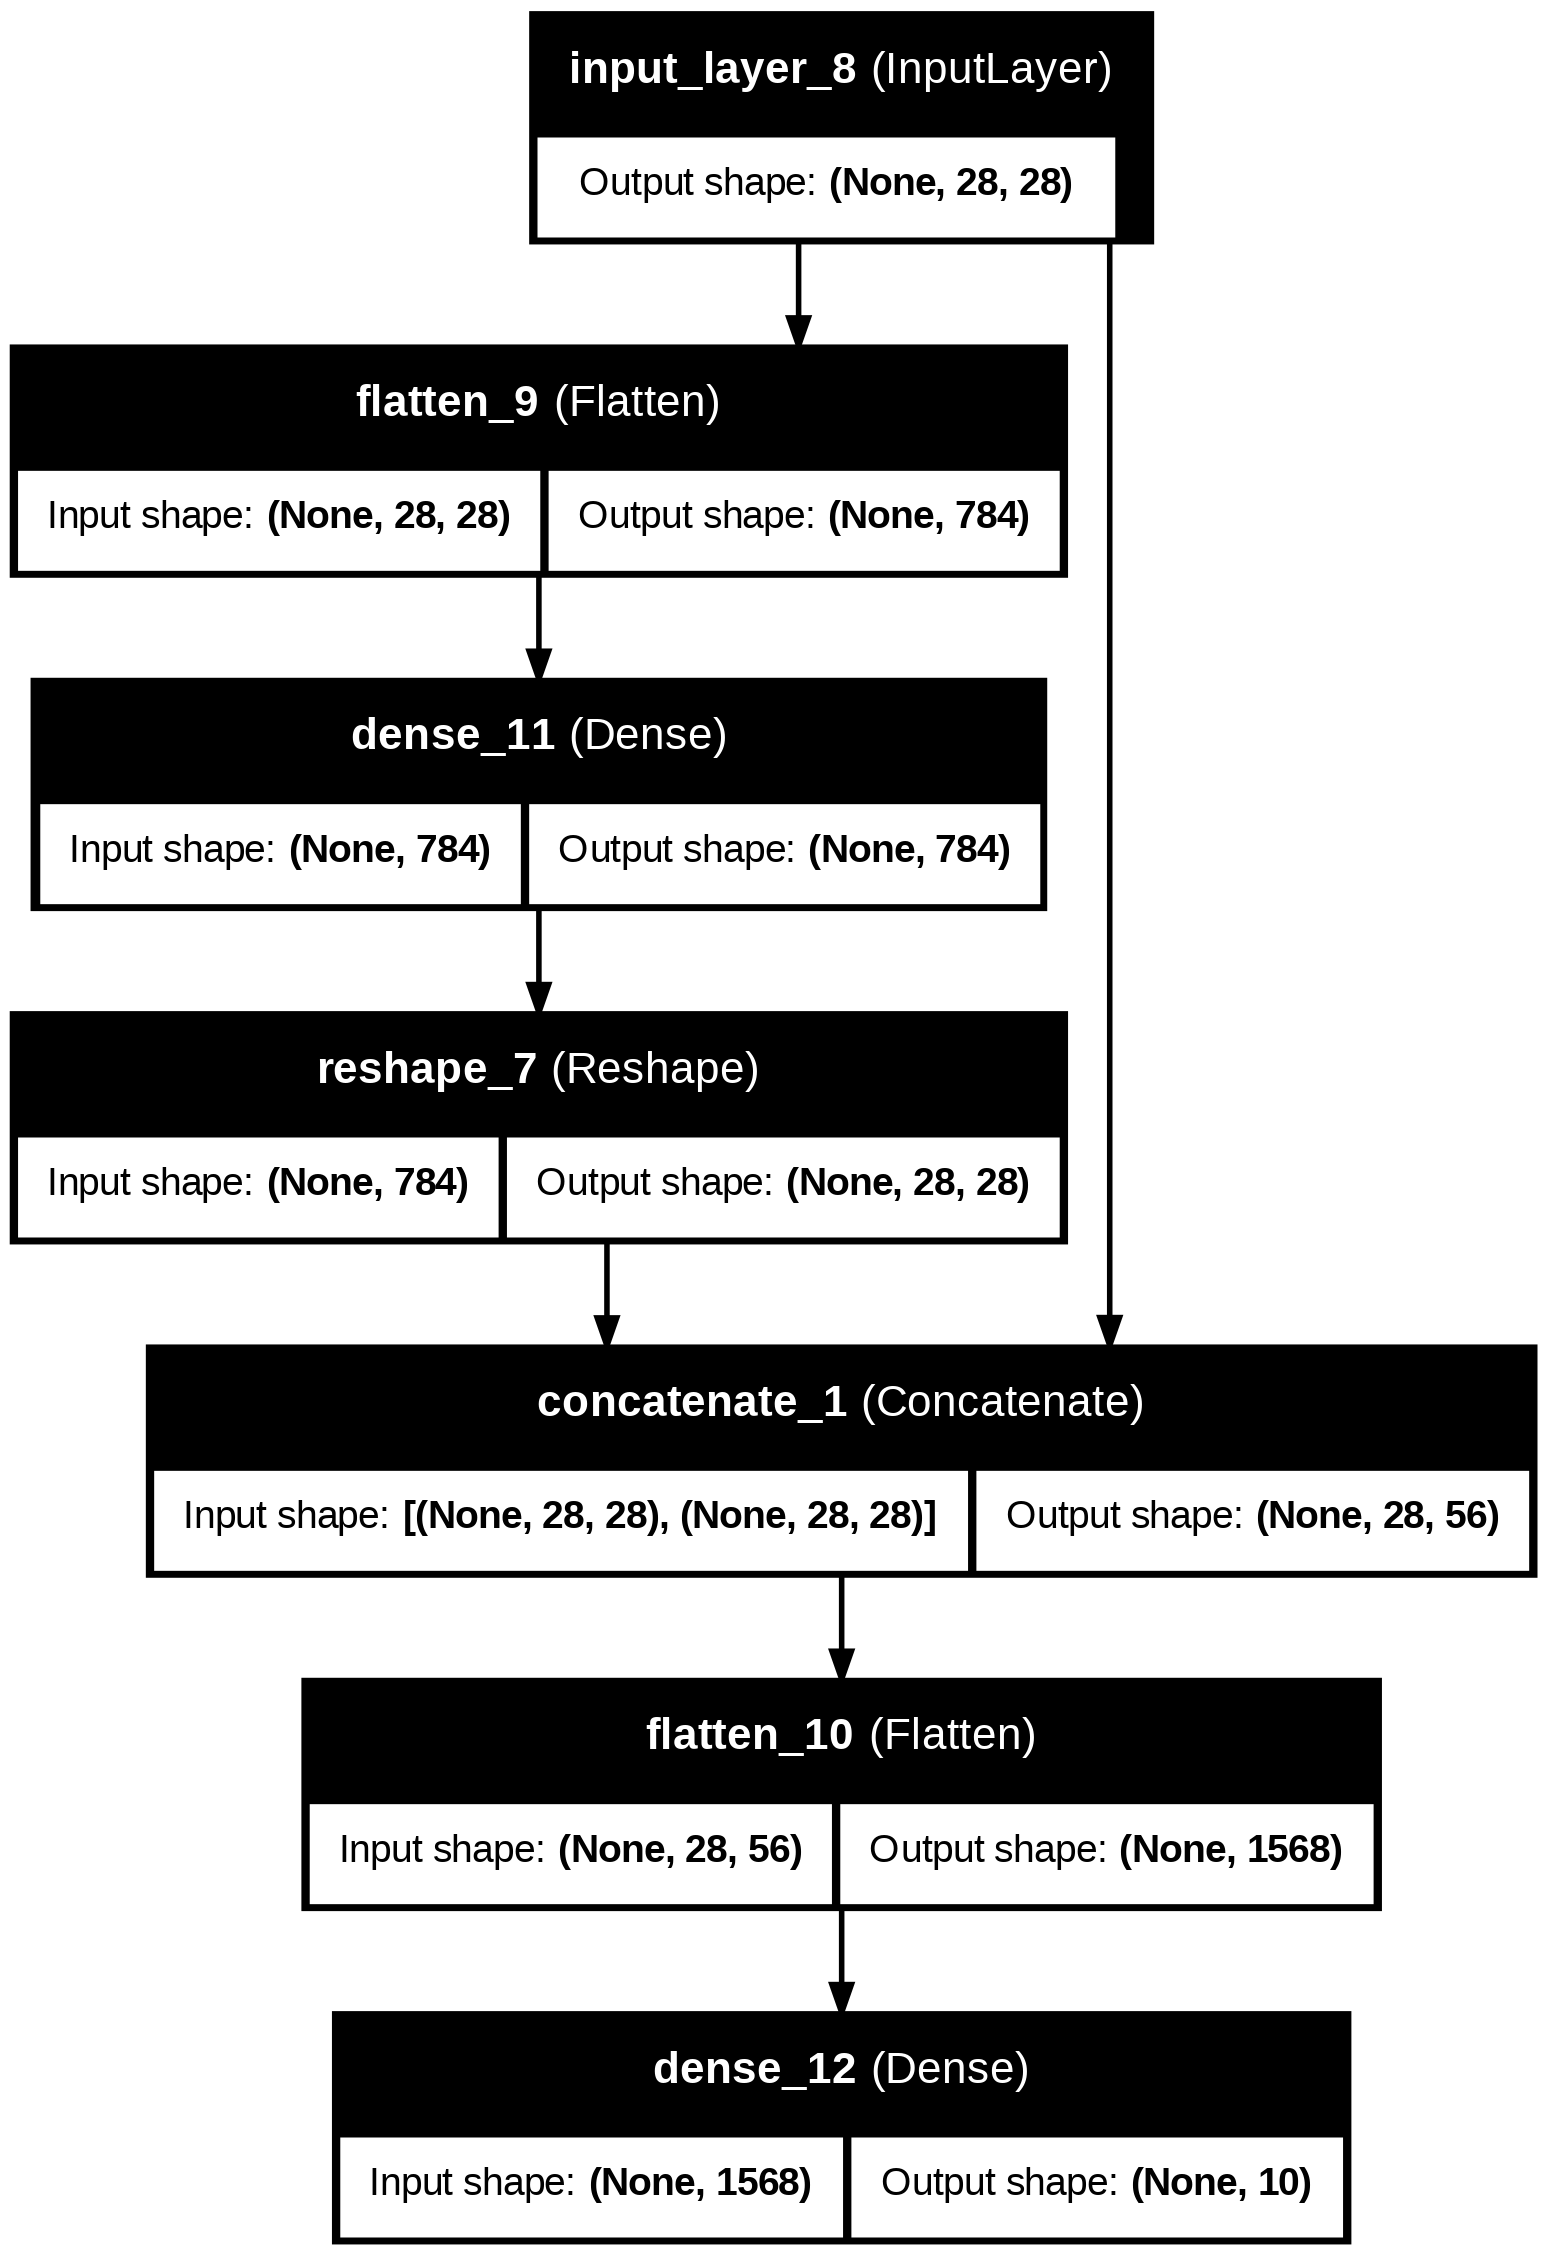

In [ ]:
'''
Concatenate()를 사용할 때는 이전 레이어를 추가로 소괄호 안에 넣어서 언급 하지 않아도 된다.
바로 이전 레이어와 연결 된다고 이해하면 된다.
이 코드에서는 바로 이전 레이어인 reshape과 연결 된다고 이해하면 된다.

굳이 복잡한 레이어를 만드는 이유는 레이어가 구조화 되면서 원본데이터가 훼손 될 수 있기 때문이다.
인풋 레이어와 어느 정도 학습이 된 레이어를 합친 레이어를 중간부터 넣으면, 원본 데이터가 훼손 될 일이 적다고 판단한 인간의 생각이다.

'''



import tensorflow as tf

# 레이어 정의
input1 = tf.keras.layers.Input(shape=[28, 28])
flatten1 = tf.keras.layers.Flatten()(input1)
dense1 = tf.keras.layers.Dense(28*28, activation='relu')(flatten1)
reshape = tf.keras.layers.Reshape((28, 28))(dense1)

concat1 = tf.keras.layers.Concatenate()([input1, reshape])
flatten2 = tf.keras.layers.Flatten()(concat1)
output = tf.keras.layers.Dense(10, activation='softmax')(flatten2)

# 모델 생성
model = tf.keras.Model(inputs=input1, outputs=output)

from tensorflow.keras.utils import plot_model

# 모델 구조 시각화
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)